In [1]:
from Bio import SeqIO
import os
family_list = ["Lycaenidae","Nymphalidae","Papilionidae","Pieridae"]
family = "Lycaenidae"
for family in family_list:
    gene = "timeout"
    gene_folder = "15.Timeout_Exon_Analysis"
    location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}/"
    
    alignment_file = SeqIO.parse(f"{location}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
    output = ''
    for records in alignment_file:
        output += records.id+ ","
        gap_start = 0
        for i in range(len(records.seq)):
            if records.seq[i] == "-" and gap_start == 0:
                output += f"{i+1}-"
                gap_start = 1
            if gap_start == 1 and records.seq[i] != "-":
                output += f"{i+1},"
                gap_start = 0
        if gap_start == 1:   
            output += f"{i+1}\n"
        else:
            output =output[:-1]+"\n"
        
    print(output)
    list_of_folder_1 = os.listdir(f"{location}/{family}")
    if "05.Summary Figure" not in list_of_folder_1:
        os.mkdir(f"{location}/{family}/05.Summary Figure")
    with open(f"{location}/{family}/05.Summary Figure/gap_position.txt", 'w') as out_file:
        out_file.write(output)

Calycopis_cecrops-timeout,1636-1645,1657-1660,2017-2023,2068-2071,2812-2821,2902-2908,2950-2965,2989-2992,3010-3013,3016-3031,3121-3133,3496-3499,3505-3529,3574-3577,3610-3619,3640-3646,3652-3658,3664-3724,3745-3748,3805-3823,3835-3838,3877-3880,3943-3949,3955-3958,4012-4015,4024-4026
Eumaeus_atala-timeout,1636-1645,1657-1660,2017-2023,2032-2059,2068-2071,2812-2821,2902-2908,2950-2953,3010-3013,3016-3031,3121-3133,3505-3529,3574-3577,3610-3619,3640-3646,3652-3658,3664-3724,3745-3748,3805-3823,3835-3838,3877-3880,3943-3949,3955-3958,4012-4015
Helleia_helle-timeout,1390-1393,1636-1645,1657-1660,2017-2023,2032-2065,2068-2071,2812-2821,2902-2908,2929-2932,2965-2974,3010-3013,3016-3031,3100-3103,3121-3133,3487-3493,3496-3499,3523-3529,3574-3577,3610-3619,3652-3658,3664-3724,3805-3820,3835-3838,3877-3880,3934-3940,3943-3949,4024-4026
Lycaena_phlaeas-timeout,1390-1393,1636-1645,1657-1660,2017-2023,2032-2059,2068-2071,2812-2821,2902-2908,2929-2932,2950-2953,2965-2974,3016-3031,3100-3103,3121-3

# Make files for pfam

In [2]:

from Bio import SeqIO
output = ''
# alignment_file = SeqIO.parse(f"{location}/Combined/full_alignment.fas", 'fasta')
alignment_file = SeqIO.parse(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}/Combined/Combined_{gene}.fas", 'fasta')
for records in alignment_file:
    output += f">{records.id}\n{records.seq.translate()[:-1]}\n"
# with open(f"{location}/Combined/translated_for_pfam.fas",'w') as out_file:
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}/Combined/translated_for_pfam_{gene}.fas",'w') as out_file:
    out_file.write(output)

# Process interpro files to get just pfam entries

In [3]:
# gene = "Cycle"
# gene_folder = "10.Cycle_Exon_Analysis"
location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}/"

with open(f"{location}/Combined/iprscan5-R20241007-155951-0561-32333378-p1m.tsv", 'r') as interpro_file:
    interpro_list = interpro_file.readlines()
output = ''
for line in interpro_list:
    if line.split("\t")[3] == "Pfam":
        output += (line)

with open(f"{location}/Combined/pfam_results.txt", 'w') as out_file:
    out_file.write(output)


In [5]:
def determine_species_group(species_name, list_of_species_groups, location):
    import os

    for group_name in list_of_species_groups:
        list_of_species = os.listdir(f"{location}/{group_name}/1.Blast_result")
        if species_name in list_of_species:
            return(group_name)

from Bio import SeqIO
family_list = ["Lycaenidae","Nymphalidae","Papilionidae","Pieridae"]
# gene = "Cycle"
# gene_folder = "10.Cycle_Exon_Analysis"
location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/"
list_of_species_groups = ["3.Satyrine","3.Satyrine_exon1_dup","4.Pierinae","5.Coliadinae","6.Heliconiinae_Danainae_Nymphalinae","7.Papilionidae","8.Lycaenidae"]
    
for family in family_list:
    
    
    fasta_file = SeqIO.parse(f"{location}/12.Family_specific_tests_{gene}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
    output = ""
    for records in fasta_file:
        if "c-album" in records.id:
            species_name = f'{records.id.split("-")[0]}-{records.id.split("-")[1]}'
        else:
            species_name = (records.id.split("-")[0])
        if "2" in species_name[-1]:
            species_name = species_name[:-1]
        
        group_name = determine_species_group(species_name, list_of_species_groups, location)
        
        with open(f"{location}/{group_name}/1.Blast_result/{species_name}/final_coordinates.csv", 'r') as coordinate_file:
            coordinate_list = coordinate_file.readlines()
            
            
            
    
        
        exon_dictionary = {}
    
        for i in range(1,len(coordinate_list)):
            coordinate_split = coordinate_list[i].split(",")
            if coordinate_split[5] == "N":
                exon_start,exon_stop = int(coordinate_split[2]),int(coordinate_split[3])
            else:
                exon_start,exon_stop = 0,0
            exon_dictionary[i] = exon_stop-exon_start
    
                
        # print("".join(coordinate_list))
        # print(exon_dictionary)
        pos_counter = 0
        seq_counter = 0
        output += f"{records.id}"  
        # print(len(records.seq))
        for key,value in exon_dictionary.items():
            output +=f",{pos_counter+1}-" 
            exon_length = (seq_counter + int(value)+1)
            # print(output, f"Exon_{key}", exon_length)
            while pos_counter < len(records.seq):
                
                pos_counter += 1
                # print(records.seq[pos_counter-1],pos_counter,seq_counter)
                if records.seq[pos_counter-1] != "-":
                    seq_counter += 1
                    # print(records.seq[pos_counter-1],seq_counter)
                if seq_counter == exon_length:
                    output += f"{pos_counter}"
                    break
            
                
    
        if output[-1] == "-":
            output += f"{pos_counter}"
        output += "\n"
    print(output)
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/05.Summary Figure/exon_position.txt", 'w') as out_file:
        out_file.write(output)

Calycopis_cecrops-timeout,1-254,255-438,439-573,574-830,831-1028,1029-1211,1212-1499,1500-1618,1619-1781,1782-1862,1863-1972,1973-2032,2033-2132,2133-2331,2332-2480,2481-2575,2576-2782,2783-2947,2948-3193,3194-3390,3391-3928,3929-4026
Eumaeus_atala-timeout,1-254,255-438,439-573,574-830,831-1028,1029-1211,1212-1499,1500-1618,1619-1781,1782-1862,1863-1972,1973-2059,2060-2132,2133-2331,2332-2480,2481-2575,2576-2782,2783-2947,2948-3193,3194-3390,3391-3928,3929-4026
Helleia_helle-timeout,1-254,255-438,439-573,574-830,831-1028,1029-1211,1212-1499,1500-1618,1619-1781,1782-1862,1863-1972,1973-2029,2030-2132,2133-2331,2332-2480,2481-2575,2576-2782,2783-2947,2948-3193,3194-3390,3391-3928,3929-4026
Lycaena_phlaeas-timeout,1-254,255-438,439-573,574-830,831-1028,1029-1211,1212-1499,1500-1618,1619-1781,1782-1862,1863-1972,1973-2029,2030-2132,2133-2331,2332-2480,2481-2575,2576-2782,2783-2947,2948-3193,3194-3390,3391-3928,3929-4026
Aricia_agestis-timeout,1-254,255-438,439-573,574-830,831-1028,1029-121

In [6]:
from Bio import SeqIO
# gene = "CLOCK"
# gene_folder = "9.CLOCK Exon Analysis"
location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/"
with open(f"{location}/12.Family_specific_tests_{gene}/Combined/pfam_results.txt", 'r') as pfam_results:
    pfam_list = pfam_results.readlines()
family_list = ["Lycaenidae","Nymphalidae","Papilionidae","Pieridae"]
for family in family_list:
    output = ''
    for line in pfam_list:
        line_split = line.split("\t")
        sequence_name = line_split[0]
        region_start,region_stop = int(line_split[6]),int(line_split[7])
        
    
        fasta_file = SeqIO.parse(f"{location}/12.Family_specific_tests_{gene}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
        for records in fasta_file:
            if sequence_name == records.id:
                pos_counter = 0
                seq_counter = 0
                new_start, new_stop = 0,0
                sequence = records.seq.translate()
                for residue in sequence:
                    pos_counter += 1
                    # print(residue)
                    if residue != "-":
                        seq_counter += 1
                    if seq_counter == region_start:
                        new_start = pos_counter
                    if seq_counter == region_stop:
                        new_stop = pos_counter
                        break
                        
                print(records.id,region_start,region_stop, new_start, new_stop)
                line_split[6] = str(new_start)
                line_split[7] = str(new_stop)
                output += "\t".join(line_split)            
                # assert False
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/05.Summary Figure/pfam_results_position_fixed.txt", 'w') as out_file:
        out_file.write(output)

Lysandra_bellargus-timeout 1019 1104 1060 1145
Lysandra_bellargus-timeout 25 287 25 287
Eumaeus_atala-timeout 1027 1113 1059 1145
Eumaeus_atala-timeout 25 287 25 287
Helleia_helle-timeout 25 287 25 287
Helleia_helle-timeout 1021 1106 1060 1145
Plebejus_argus-timeout 25 287 25 287
Plebejus_argus-timeout 1019 1104 1060 1145
Lysandra_coridon-timeout 1019 1104 1060 1145
Lysandra_coridon-timeout 25 287 25 287
Phengaris_arion-timeout 1023 1108 1060 1145
Phengaris_arion-timeout 25 287 25 287
Calycopis_cecrops-timeout 1032 1117 1060 1145
Calycopis_cecrops-timeout 25 287 25 287
Aricia_agestis-timeout 1019 1104 1060 1145
Aricia_agestis-timeout 25 287 25 287
Polyommatus_iphigenia-timeout 1022 1107 1060 1145
Polyommatus_iphigenia-timeout 25 287 25 287
Celastrina_argiolus-timeout 1028 1113 1060 1145
Celastrina_argiolus-timeout 25 287 25 287
Polyommatus_icarus-timeout 25 287 25 287
Polyommatus_icarus-timeout 1019 1104 1060 1145
Lycaena_phlaeas-timeout 1022 1107 1060 1145
Lycaena_phlaeas-timeout 25 2

In [7]:
import json
from Bio import SeqIO
# gene = "CLOCK"
# gene_folder = "9.CLOCK Exon Analysis"

location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/"
family_list = ["Lycaenidae","Nymphalidae","Papilionidae","Pieridae"]
family = "Nymphalidae"
for family in family_list:
    location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/"
    ################new code
    trimmed_fasta_list = []
    untrimmed_fasta_list = []
    
    
    untimmed_fasta_file = SeqIO.parse(f"{location}/12.Family_specific_tests_{gene}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
    untrimmed_sequence_list = []
    for records in untimmed_fasta_file:
        untrimmed_sequence_list.append(records.seq.translate())
    for i in range(len(untrimmed_sequence_list[0])):
        dic_key = ''
        for aligned_sequence in untrimmed_sequence_list:
            dic_key += aligned_sequence[i]
        untrimmed_fasta_list.append(dic_key)
    
    
    timmed_fasta_file = SeqIO.parse(f"{location}/12.Family_specific_tests_{gene}/{family}/{family}_{gene}_nostop.fas.aligned.fas.trimal.fas", 'fasta')
    trimmed_sequence_list = []
    for records in timmed_fasta_file:
        trimmed_sequence_list.append(records.seq.translate())
    for i in range(len(trimmed_sequence_list[0])):
        dic_key = ''
        for aligned_sequence in trimmed_sequence_list:
            dic_key += aligned_sequence[i]
        trimmed_fasta_list.append(dic_key)
    
    #####################
    
    
    
    
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/03.FEL/{family}_{gene}_nostop.fas.aligned.fas.trimal.fas.FEL.json", 'r') as f:
        json_file = json.load(f)
    
    list_of_values = (json_file["MLE"]["content"]["0"])
    pervasive_sites_trimmed = []
    for i in range(len(list_of_values)):
        if float(list_of_values[i][4]) < 0.05:
            if float(list_of_values[i][0]) < float(list_of_values[i][1]):
                pervasive_sites_trimmed.append(i+1)
    
    
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/03.FEL/{family}_{gene}_nostop.fas.aligned.fas.best.fas.FEL.json", 'r') as f:
        json_file = json.load(f)
    
    list_of_values = (json_file["MLE"]["content"]["0"])
    pervasive_sites_untrimmed = []
    for i in range(len(list_of_values)):
        if float(list_of_values[i][4]) < 0.05:
            if float(list_of_values[i][0]) < float(list_of_values[i][1]):
                pervasive_sites_untrimmed.append(i+1)
    
    print("Pervasive",pervasive_sites_untrimmed, pervasive_sites_trimmed)
    
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/04.MEME/{family}_{gene}_nostop.fas.aligned.fas.trimal.fas.MEME.json", 'r') as f:
        json_file = json.load(f)
    
    list_of_values = (json_file["MLE"]["content"]["0"])
    episodic_sites_trimmed = []
    for i in range(len(list_of_values)):
        if float(list_of_values[i][6]) < 0.05:
            episodic_sites_trimmed.append(i+1)
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/04.MEME/{family}_{gene}_nostop.fas.aligned.fas.best.fas.MEME.json", 'r') as f:
        json_file = json.load(f)
    
    list_of_values = (json_file["MLE"]["content"]["0"])
    episodic_sites_untrimmed = []
    for i in range(len(list_of_values)):
        if float(list_of_values[i][6]) < 0.05:
            
            episodic_sites_untrimmed.append(i+1)
    
    print("Episodic",episodic_sites_untrimmed, episodic_sites_trimmed)
    
                
        # break
    pervasive_old = pervasive_sites_trimmed
    pervasive = []
    episodic_old = episodic_sites_trimmed
    episodic = []
    
    with open(f"{location}/12.Family_specific_tests_{gene}/{family}/1.trimal_outputs/columns_kept.txt", 'r') as column_file:
        columns = column_file.readlines()[0].split("\t")[1].split(",")
    # print(columns)
    # for i in range(len(columns)):
    #     print(i,columns[i])
    # for i in pervasive_old:
    #     # print(columns[i])
        
    #     if int(columns[i]) in pervasive_sites_untrimmed:
    #         pervasive.append(int(columns[i]))
    #     else:
    #         print(f"Pervasive Site_trimmed = {i}, Site_untrimmed = {columns[i]}")
    #         pervasive.append(int(input("Proper Site")))
    # for i in episodic_old:
    #     if int(columns[i]) in episodic_sites_untrimmed:
    #         episodic.append(int(columns[i]))
    #     else:
    #         print(f"Episodic Site_trimmed = {i}, Site_untrimmed = {columns[i]}")
    #         episodic.append(int(input("Proper Site")))
    
    for i in pervasive_old:
        pervasive.append(int(untrimmed_fasta_list.index(trimmed_fasta_list[int(i-1)]))+1)
        
    # print(len(trimmed_fasta_list))
    for i in episodic_old:
        episodic.append(untrimmed_fasta_list.index(trimmed_fasta_list[int(i-1)])+1)
        
    print(pervasive)
    
    
    
    import drawsvg as draw
    from Bio import SeqIO
    import os
    location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}"
    length_factor = 1
    list_of_files_test1 = os.listdir(f"{location}/{family}")
    print(list_of_files_test1)
    fasta_file = SeqIO.parse(f"{location}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
    species_sequence_dic = {}
    for record in fasta_file:
        total_length = len(record.seq)/length_factor
        species_sequence_dic[record.id] = record.seq
        # break
    
    color_dictionary = {"G":"#EBEBEB","H":"#8282D2","P":"#DC9682","A":"#C8C8C8","W":"#B45AB4","S":"#FA9600","T":"#FA9600","V":"#0F820F","I":"#0F820F","L":"#0F820F","F":"#3232AA","Y":"#3232AA","C":"#E6E600","M":"#E6E600","D":"#E60A0A","E":"#E60A0A","N":"#00DCDC","Q":"#00DCDC","K":"#145AFF","R":"#145AFF","-":"#BEA06E"}
    print(total_length)
    # total_length = 1947
    print(species_sequence_dic)
    from Bio import Phylo
    tree = Phylo.read(f"{location}/{family}/{family}_{gene}_nostop.fas.aligned.fas.trimal.fas.treefile", 'newick')
    species_list = [term.name for term in tree.get_terminals()]
    # print(species_list)
    
    # dm = "Drosophila_melanogaster-AAA28752-period,1-180,211-212,242-250,283-322,522-524,526-529,533-534,553-559,560-568,754-759,795-797,802-803,832-833,842-850,895-899,907-909,915-916,921-939,959-962,1083-1084,1086-1087,1105-1112,1114-1129,1141-1142,1147-1148,1153-1156,1176-1234,1242-1250,1255-1258,1264-1265,1307-1309,1317-1319,1343-1349,1356-1358,1360-1361,1386-1395,1428-1439,1462-1475,1530-1584,1604-1643".split(",")
    with open(f"{location}/{family}/05.Summary Figure/gap_position.txt", 'r') as gap_file:
        gap_list = gap_file.readlines()
    with open(f"{location}/{family}/05.Summary Figure/pfam_results_position_fixed.txt", 'r') as domain_file:
        domain_list = domain_file.readlines()
    with open(f"{location}/{family}/05.Summary Figure/exon_position.txt", 'r') as exons_file:
        exons_list = exons_file.readlines()
    
    # pervasive = []
    
    # episodic = [340*3]    
    
    
    
    
    d = draw.Drawing(total_length, 80*len(gap_list))    
    
    for species_number in range(len(species_list)):
        species_name = species_list[species_number]
        # print(species_name)
        
        for gap_line in range(len(gap_list)):
            
            dm = gap_list[gap_line].strip().split(",")
            
            if dm[0] == species_name:
                print(dm[0])
                d.append(draw.Lines(10, 20*(species_number+1) + 50*(species_number) + 20,
                                     10+(total_length/10)*5, 20*(species_number+1)+ 50*(species_number) + 20,
                                    10+(total_length/10)*5,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                    10,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                    close=True,
                            fill='#eeee00',
                            stroke='black'))
                d.append(draw.Text(dm[0], 12, 10, 20*(species_number+1)-18+ 50*(species_number) + 20))
                length = round((total_length)/100)
                # print(length)
                
                
                for episodic_pos in episodic:
                    episodic_position = (episodic_pos-1)*3
                    base = species_sequence_dic[species_name][episodic_position:episodic_position+3].translate()
                    d.append(draw.Text(f"{base}", 15, 10+((episodic_position-3)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20,fill=color_dictionary[base], fontWeight='bold'))                    
                for pervasive_pos in pervasive:
                    if pervasive_pos not in episodic:
                        pervasive_position = (pervasive_pos-1)*3
                        base = species_sequence_dic[species_name][pervasive_position:pervasive_position+3].translate()
                        d.append(draw.Text(f"{base}", 15, 10+((pervasive_position-3)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20,fill=color_dictionary[base], fontWeight='bold'))                    
    
                for domain_line in domain_list:
                    if dm[0] in domain_line:
                        domain_line_split = domain_line.strip().split("\t")
                    
                        start, stop = int(domain_line_split[6])*3/length_factor, int(domain_line_split[7])*3/length_factor
                        
                        d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#AA336A"))
                        d.append(draw.Text(f"{domain_line_split[5]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
                   
                
                for i in range(1,len(dm)):
                    # print(dm[i])
                    start,stop = int(dm[i].split("-")[0])/length_factor,int(dm[i].split("-")[1])/length_factor
                    d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                       10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                       10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                       10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                       close = True,
                                       fill = "#808080"))
               
                for exon_line in exons_list:
                    if dm[0] in exon_line:
                        exon_line_split = exon_line.strip().split(",")
                        # print(exon_line_split)
                        exon_counter = 1
                        for i in range (1, len(exon_line_split)):
                            start,stop = int(exon_line_split[i].split("-")[0])/length_factor+1,(int(exon_line_split[i].split("-")[1])-1)/length_factor
                            d.append(draw.Lines(10+((start-1)*.5), 23+ 20*(species_number+1)+ 50*(species_number) + 20,
                                                10+((start-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                                10 + ((stop-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                                10 + ((stop-1)*.5), 23 + 20*(species_number+1)+ 50*(species_number) + 20,
                                       
                                       
                                       close = True,
                                       fill = "#00008B"))
                            # print(10+((start + ((stop-start)/2) -1)*.5), 35 + 20*(species_number+1)+ 30*(species_number))
                            d.append(draw.Text(str(exon_counter), 10, 10+((start + ((stop-start)/2) -5)*.5), 35 + 20*(species_number+1)+ 50*(species_number) + 20))
                            exon_counter += 1
                            # assert False
                            
    for episodic_pos in episodic:
        episodic_position = episodic_pos*3
        d.append(draw.Lines(10+((episodic_position)*.5),30 + 20*(species_number+1)+ 50*(species_number) + 20,
                       10+((episodic_position-15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
                       10+((episodic_position+15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
                       
                       close = True,
                       fill = "blue"))
        d.append(draw.Text(f"{episodic_pos}", 8, 10+((episodic_position-10)*.5), 55 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                   
    
    
    for pervasive_pos in pervasive:
        pervasive_position = pervasive_pos*3
        d.append(draw.Lines(10+((pervasive_position)*.5),60 + 20*(species_number+1)+ 50*(species_number) + 20,
                       10+((pervasive_position-15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
                       10+((pervasive_position+15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
                       
                       close = True,
                       fill = "green"))
                
        d.append(draw.Text(f"{pervasive_pos}", 8, 10+((pervasive_position-10)*.5), 85 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                               
                    # print(dm[i])
                    # break
    
    d.save_svg(f"{location}/{family}/05.Summary Figure/domains.svg" )
    d

Pervasive [943, 978, 1015] [929, 957, 988]
Episodic [615, 637, 656, 751, 943, 948, 978, 985, 1015, 1033, 1207, 1282] [614, 636, 655, 739, 929, 934, 957, 963, 988, 1006, 1161, 1221]
[943, 978, 1015]
['Lycaenidae_timeout.fas', 'test.py', '01.BUSTED', '02.aBSREL', '03.FEL', '04.MEME', 'std_out.txt', 'Lycaenidae_timeout_nostop.fas', 'Lycaenidae_timeout_nostop.fas.aligned.fas.best.fas', '1.trimal_outputs', '2.iqtree_outputs', 'Lycaenidae_timeout_nostop.fas.aligned.fas.trimal.fas.treefile', 'Lycaenidae_timeout_nostop.fas.aligned.fas.best.fas.treefile', 'Lycaenidae_timeout_nostop.fas.aligned.fas.trimal.fas', '05.Summary Figure', 'desktop.ini']
4026.0
{'Calycopis_cecrops-timeout': Seq('ATGAGCTCATTATTATCTGCTGAACTCTCAGCAACATGTAATGCTCTAGGAACA...---'), 'Eumaeus_atala-timeout': Seq('ATGAGCTCATTACTATCTGCTGAACTTTCAGCAACATGTAATGCTCTAGGAACA...GAA'), 'Helleia_helle-timeout': Seq('ATGAGCTCCTTATTATCTGCTGAACTCTCAGCAACATGCAATGCTCTAGGAACA...---'), 'Lycaena_phlaeas-timeout': Seq('ATGAGCTCCTTACTATCGGCTGAACTTTC

['test.py', 'Lycaenidae_timeless_nostop.fas', 'Lycaenidae_timeless_nostop.fas.aligned.fas.best.fas', 'Lycaenidae_timeless_nostop.fas.aligned.fas.trimal.fas.treefile', 'Lycaenidae_timeless_nostop.fas.aligned.fas.trimal.fas', 'Lycaenidae_timeless_nostop.fas.aligned.fas.best.fas.treefile', 'stdout.txt', '1.trimal_outputs', '2.iqtree_outputs', 'Lycaenidae_timeless.fas', '02.aBSREL', '03.FEL', '04.MEME', '01.BUSTED', '05.Summary Figure', 'Lycaenidae_timeless_nostop.fas.aligned.fas.trimal.fas.treefile_figtree', 'desktop.ini']
3915.0
{'Helleia_helle-timeless': Seq('ATGGCGTGGGTTTTGCACAGCCCGCAGATACACAGTTCATTCAGTAATCTCGGT...TTT'), 'Lycaena_phlaeas-timeless': Seq('ATGGCGTGGGTTCTGCGAAGCCCGCAGATACACAGTTCCTTCAGTAATCTCGGT...TTT'), 'Aricia_agestis-timeless': Seq('ATGGCGTGGGTCCTTCGCACCCCCCAAATACATAGCTCATTCAGTAATCTCGGA...CTG'), 'Aricia_artaxerxes-timeless': Seq('ATGGCGTGGGTCCTTCGCACCCCCCAAATACATAGCTCATTCAGTAATCTCGGA...CTG'), 'Cyaniris_semiargus-timeless': Seq('ATGGCGTGGGTCCTTCGCACCCCCCAAATACATAGCTCATTCA

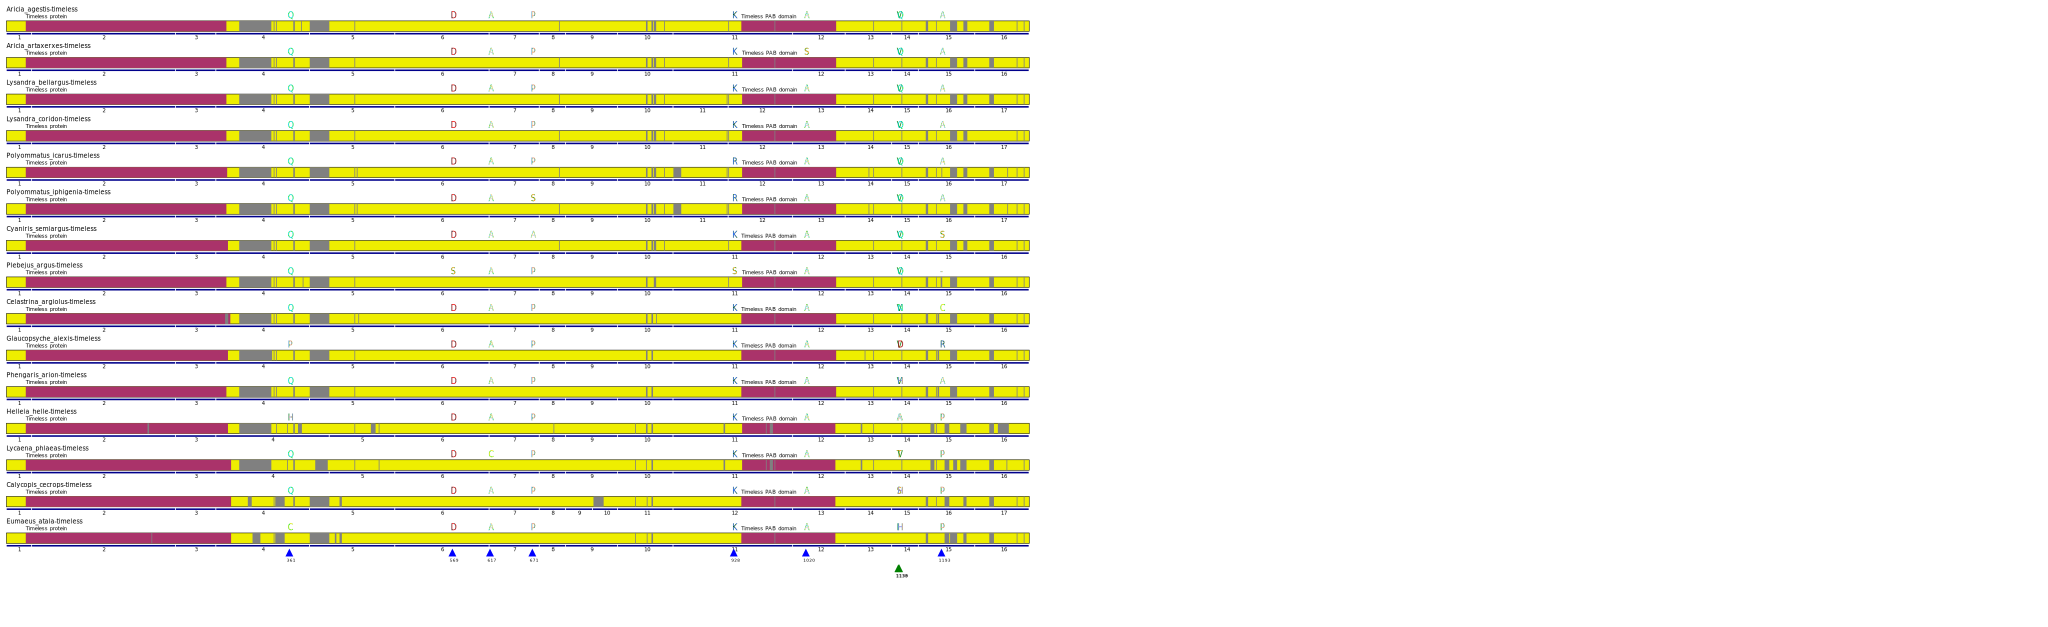

In [14]:
import drawsvg as draw
from Bio import SeqIO
import os
location = f"/mnt/g/My Drive/Circadian Rhythm Genes Project/{gene_folder}/12.Family_specific_tests_{gene}"
length_factor = 1
list_of_files_test1 = os.listdir(f"{location}/{family}")
print(list_of_files_test1)
fasta_file = SeqIO.parse(f"{location}/{family}/{family}_{gene}_nostop.fas.aligned.fas.best.fas", 'fasta')
species_sequence_dic = {}
for record in fasta_file:
    total_length = len(record.seq)/length_factor
    species_sequence_dic[record.id] = record.seq
    # break

color_dictionary = {"G":"#EBEBEB","H":"#8282D2","P":"#DC9682","A":"#C8C8C8","W":"#B45AB4","S":"#FA9600","T":"#FA9600","V":"#0F820F","I":"#0F820F","L":"#0F820F","F":"#3232AA","Y":"#3232AA","C":"#E6E600","M":"#E6E600","D":"#E60A0A","E":"#E60A0A","N":"#00DCDC","Q":"#00DCDC","K":"#145AFF","R":"#145AFF","-":"#BEA06E"}
print(total_length)
# total_length = 1947
print(species_sequence_dic)
from Bio import Phylo
tree = Phylo.read(f"{location}/{family}/{family}_{gene}_nostop.fas.aligned.fas.trimal.fas.treefile_figtree", 'newick')
species_list = [term.name for term in tree.get_terminals()]
# print(species_list)

# dm = "Drosophila_melanogaster-AAA28752-period,1-180,211-212,242-250,283-322,522-524,526-529,533-534,553-559,560-568,754-759,795-797,802-803,832-833,842-850,895-899,907-909,915-916,921-939,959-962,1083-1084,1086-1087,1105-1112,1114-1129,1141-1142,1147-1148,1153-1156,1176-1234,1242-1250,1255-1258,1264-1265,1307-1309,1317-1319,1343-1349,1356-1358,1360-1361,1386-1395,1428-1439,1462-1475,1530-1584,1604-1643".split(",")
with open(f"{location}/{family}/05.Summary Figure/gap_position.txt", 'r') as gap_file:
    gap_list = gap_file.readlines()
with open(f"{location}/{family}/05.Summary Figure/pfam_results_position_fixed.txt", 'r') as domain_file:
    domain_list = domain_file.readlines()
with open(f"{location}/{family}/05.Summary Figure/exon_position.txt", 'r') as exons_file:
    exons_list = exons_file.readlines()

# pervasive = []

# episodic = [340*3]    




d = draw.Drawing(total_length, 80*len(gap_list))    

for species_number in range(len(species_list)):
    species_name = species_list[species_number]
    # print(species_name)
    
    for gap_line in range(len(gap_list)):
        
        dm = gap_list[gap_line].strip().split(",")
        
        if dm[0] == species_name:
            print(dm[0])
            d.append(draw.Lines(10, 20*(species_number+1) + 50*(species_number) + 20,
                                 10+(total_length/10)*5, 20*(species_number+1)+ 50*(species_number) + 20,
                                10+(total_length/10)*5,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                10,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                close=True,
                        fill='#eeee00',
                        stroke='black'))
            d.append(draw.Text(dm[0], 12, 10, 20*(species_number+1)-18+ 50*(species_number) + 20))
            length = round((total_length)/100)
            # print(length)
            
            
            for episodic_pos in episodic:
                episodic_position = (episodic_pos-1)*3
                base = species_sequence_dic[species_name][episodic_position:episodic_position+3].translate()
                d.append(draw.Text(f"{base}", 15, 10+((episodic_position-3)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20,fill=color_dictionary[base], fontWeight='bold'))                    
            for pervasive_pos in pervasive:
                if pervasive_pos not in episodic:
                    pervasive_position = (pervasive_pos-1)*3
                    base = species_sequence_dic[species_name][pervasive_position:pervasive_position+3].translate()
                    d.append(draw.Text(f"{base}", 15, 10+((pervasive_position-3)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20,fill=color_dictionary[base], fontWeight='bold'))                    

            for domain_line in domain_list:
                if dm[0] in domain_line:
                    domain_line_split = domain_line.strip().split("\t")
                
                    start, stop = int(domain_line_split[6])*3/length_factor, int(domain_line_split[7])*3/length_factor
                    
                    d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                               10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                               10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                               10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                               close = True,
                               fill = "#AA336A"))
                    d.append(draw.Text(f"{domain_line_split[5]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
               
            
            for i in range(1,len(dm)):
                # print(dm[i])
                start,stop = int(dm[i].split("-")[0])/length_factor,int(dm[i].split("-")[1])/length_factor
                d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#808080"))
           
            for exon_line in exons_list:
                if dm[0] in exon_line:
                    exon_line_split = exon_line.strip().split(",")
                    # print(exon_line_split)
                    exon_counter = 1
                    for i in range (1, len(exon_line_split)):
                        start,stop = int(exon_line_split[i].split("-")[0])/length_factor+1,(int(exon_line_split[i].split("-")[1])-1)/length_factor
                        d.append(draw.Lines(10+((start-1)*.5), 23+ 20*(species_number+1)+ 50*(species_number) + 20,
                                            10+((start-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 23 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   
                                   
                                   close = True,
                                   fill = "#00008B"))
                        # print(10+((start + ((stop-start)/2) -1)*.5), 35 + 20*(species_number+1)+ 30*(species_number))
                        d.append(draw.Text(str(exon_counter), 10, 10+((start + ((stop-start)/2) -5)*.5), 35 + 20*(species_number+1)+ 50*(species_number) + 20))
                        exon_counter += 1
                        # assert False
                        
for episodic_pos in episodic:
    episodic_position = episodic_pos*3
    d.append(draw.Lines(10+((episodic_position)*.5),30 + 20*(species_number+1)+ 50*(species_number) + 20,
                   10+((episodic_position-15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
                   10+((episodic_position+15)*.5),45 + 20*(species_number+1)+ 50*(species_number) + 20,
                   
                   close = True,
                   fill = "blue"))
    d.append(draw.Text(f"{episodic_pos}", 8, 10+((episodic_position-10)*.5), 55 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                   


for pervasive_pos in pervasive:
    pervasive_position = pervasive_pos*3
    d.append(draw.Lines(10+((pervasive_position)*.5),60 + 20*(species_number+1)+ 50*(species_number) + 20,
                   10+((pervasive_position-15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
                   10+((pervasive_position+15)*.5),75 + 20*(species_number+1)+ 50*(species_number) + 20,
                   
                   close = True,
                   fill = "green"))
            
    d.append(draw.Text(f"{pervasive_pos}", 8, 10+((pervasive_position-10)*.5), 85 + 20*(species_number+1)+ 50*(species_number) + 20, fontWeight='bold'))                               
                # print(dm[i])
                # break

d.save_svg(f"{location}/{family}/05.Summary Figure/domains.svg" )
d